# Case Study on the Lending Club Loan Data

### Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as  np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline


### Description of the Dataset

### Loan data from Lending Club

This data collection comprises thousands of loans made using the Lending Club platform, which allows people to lend money to other people.It is vital to remember the dataset only covers loans that were actually made and should not be confused with loan applications data. By exploring the dataset, it is noticed that not every loan is the same in the sense that there are individuals who appear likely to pay their loan when compared to others by considering loan repayment history. On the other hand someone who appears to be a safe bet to repay a loan will find it easier to obtain a low-interest loan than someone who appears to be riskier. People who take a lot of chances, may not have received a loan offer at all, or they may have rejected it due to a high interest rate.

When a person requests for a loan, the company may make one of two decisions:

<b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan.

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. 

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

<b><b>Loan rejected:</b></b> The company had rejected the loan because the candidate does not meet their requirements. Since the loan was rejected, there is no transactional history of the applicants with the company and in the dataset as well.

Objective:
Objective is to identify the risky loan applicants at the time of loan application so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

### Loading the Data 

In [44]:
df=pd.read_csv("loans_full_schema.csv")

In [45]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


#### Checking the Dataset format

In [46]:
df.shape

(10000, 55)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [48]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [49]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [50]:
# percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 2)*100

emp_title                            8.0
emp_length                           8.0
state                                0.0
homeownership                        0.0
annual_income                        0.0
verified_income                      0.0
debt_to_income                       0.0
annual_income_joint                 85.0
verification_income_joint           85.0
debt_to_income_joint                85.0
delinq_2y                            0.0
months_since_last_delinq            57.0
earliest_credit_line                 0.0
inquiries_last_12m                   0.0
total_credit_lines                   0.0
open_credit_lines                    0.0
total_credit_limit                   0.0
total_credit_utilized                0.0
num_collections_last_12m             0.0
num_historical_failed_to_pay         0.0
months_since_90d_late               77.0
current_accounts_delinq              0.0
total_collection_amount_ever         0.0
current_installment_accounts         0.0
accounts_opened_

We can see that few columns have 85% missing values. First, let's get rid of the columns having 85% missing values.

In [51]:
# removing the columns having more than 90% missing values
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 80]
print(missing_columns)

Index(['annual_income_joint', 'verification_income_joint',
       'debt_to_income_joint'],
      dtype='object')


In [52]:
df = df.drop(missing_columns, axis=1)
print(df.shape)

(10000, 52)


In [53]:
# summarise number of missing values again
100*(df.isnull().sum()/len(df.index))

emp_title                            8.33
emp_length                           8.17
state                                0.00
homeownership                        0.00
annual_income                        0.00
verified_income                      0.00
debt_to_income                       0.24
delinq_2y                            0.00
months_since_last_delinq            56.58
earliest_credit_line                 0.00
inquiries_last_12m                   0.00
total_credit_lines                   0.00
open_credit_lines                    0.00
total_credit_limit                   0.00
total_credit_utilized                0.00
num_collections_last_12m             0.00
num_historical_failed_to_pay         0.00
months_since_90d_late               77.15
current_accounts_delinq              0.00
total_collection_amount_ever         0.00
current_installment_accounts         0.00
accounts_opened_24m                  0.00
months_since_last_credit_inquiry    12.71
num_satisfactory_accounts         

The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   delinq_2y                         10000 non-null  int64  
 8   months_since_last_delinq          4342 non-null   float64
 9   earliest_credit_line              10000 non-null  int64  
 10  inquiries_last_12m                10000 non-null  int64  
 11  total_credit_lines                10000 non-null  int64  
 12  open_

In [55]:
df["homeownership"].value_counts()

MORTGAGE    4789
RENT        3858
OWN         1353
Name: homeownership, dtype: int64

In [56]:
df["loan_status"].value_counts()

Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64

In [57]:
df["disbursement_method"].value_counts()

Cash         9284
DirectPay     716
Name: disbursement_method, dtype: int64

In [58]:
df["grade"].value_counts()

B    3037
C    2653
A    2459
D    1446
E     335
F      58
G      12
Name: grade, dtype: int64

In [59]:
df["loan_purpose"].value_counts()

debt_consolidation    5144
credit_card           2249
other                  914
home_improvement       680
major_purchase         303
medical                162
house                  151
car                    131
small_business         125
moving                  69
vacation                62
renewable_energy        10
Name: loan_purpose, dtype: int64

In [60]:
df.describe()

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,0.21600,36.760709,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,0.68366,21.634939,7.79551,2.38013,11.885439,5.86828,1.876327e+05,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,0.00000,1.000000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,0.00000,19.000000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,0.00000,34.000000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,0.00000,53.000000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,13.00000,118.000000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [61]:
df['emp_length'].value_counts()

10.0    3332
2.0      967
3.0      862
0.0      690
1.0      685
5.0      645
4.0      611
6.0      404
7.0      368
9.0      312
8.0      307
Name: emp_length, dtype: int64

## Exploratory Data Analysis

## Data Exploration and Visualization

Exploratory Data Analysis (EDA) is a method of looking into datasets to discover preliminary information, insights, or underlying trends. Data can be analysed in a methodical way to get insights and make decisions instead of making assumptions.The following are some of the benefits of exploratory data analysis:Extract averages, mean, minimum, and maximum values, among other things, to gain a better understanding of variables.Identify data mistakes, outliers, and missing values. Visualize data in graphs like box plots, scatter plots, and histograms to find trends. As a result, the major goal is to obtain a better understanding of the data and to apply tools efficiently to gain useful insights or make conclusions. In the next steps exploration of the lending club variables such as loan status and interest rate is done while plotting graphs and making observations from the visualized data. 

### Loan Status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

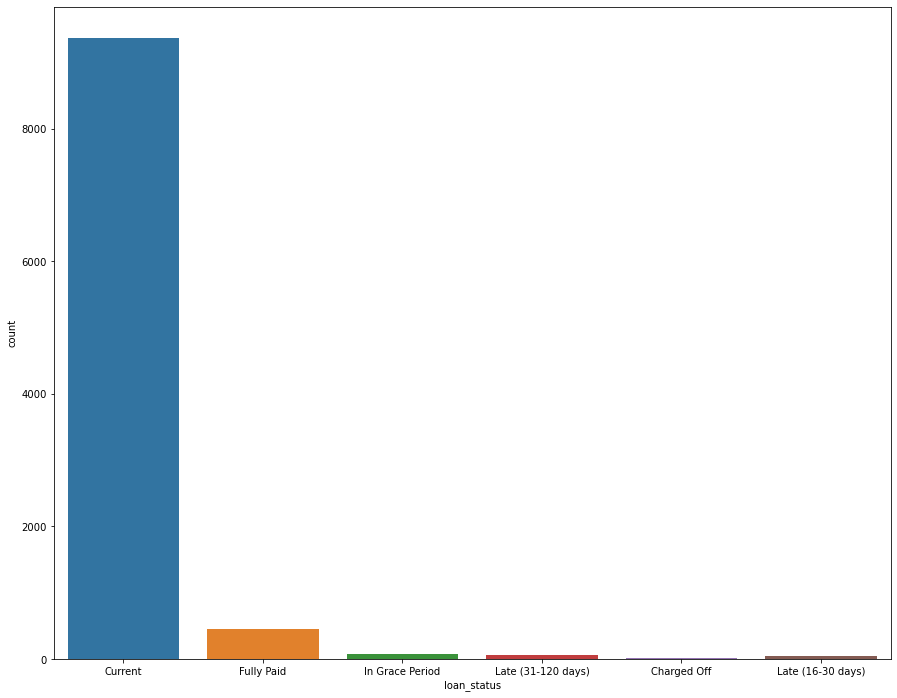

In [62]:
plt.figure(figsize=(15,12))
sns.countplot(x='loan_status',data=df)

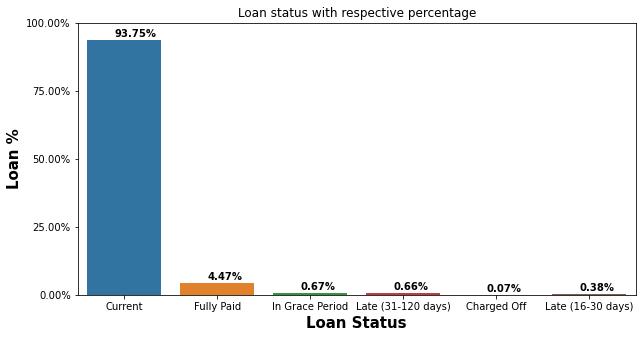

In [63]:
#Loan status with respective percentage present in the dataset
def count_plot(dataframe,col):
    plt.figure(figsize=(10,5))
    ax=sns.countplot(x=dataframe[col])
    totalrow = dataframe.shape[0]

    plt.xlabel('Loan Status',fontweight ='bold',fontsize = 15)
    plt.ylabel('Loan %',fontweight ='bold',fontsize = 15)
    plt.title('Loan status with respective percentage')
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100*p.get_height()/totalrow), (p.get_x()+0.3, p.get_height()+0.01 * totalrow),fontweight ='bold')
    
    ax.yaxis.set_ticks(np.linspace(0, totalrow, 5))
    
    _ = ax.set_yticklabels(map('{:.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/totalrow))
    plt.show()
count_plot(df,'loan_status')

Observation 1:

93.75 percent of loan are in current status,  4.47 percent  are  fully paid and 0.07 percent are 
of in the status charged off. This shows that high number of individuals are responsible towards clearing their loans when compared to those who are neglecting their loan untill they are charged off.

## Load Amount

In [64]:
df["loan_amount"].describe()

count    10000.000000
mean     16361.922500
std      10301.956759
min       1000.000000
25%       8000.000000
50%      14500.000000
75%      24000.000000
max      40000.000000
Name: loan_amount, dtype: float64

In [65]:
## create bin for loan amount
df['loan_amount_bin'] = pd.cut(df['loan_amount'], 
                               [x for x in range(0, 45000, 5000)],
                               labels=[str(x)+'-'+str(x+5000)+'k' for x in range(0,40000,5000)])
        

In [66]:
df['loan_amount_bin'].value_counts()

5000-10000k     2484
10000-15000k    1781
15000-20000k    1574
0-5000k         1339
20000-25000k     943
25000-30000k     759
35000-40000k     575
30000-35000k     545
Name: loan_amount_bin, dtype: int64

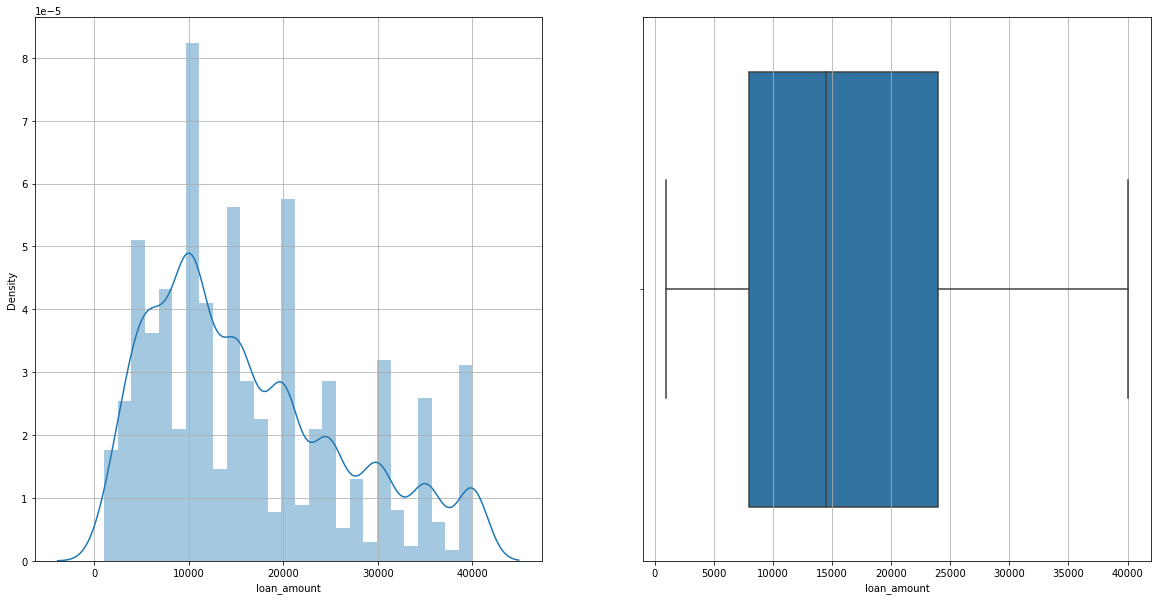

In [67]:
#Dist and box plot to know the distribution of loan_amount
def plot_distribution(dataframe, col):
    plt.figure(figsize=(20,10)) 
    plt.subplot(1, 2, 1)
    plt.grid()
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    plt.grid()
    sns.boxplot(x=dataframe[col], data=dataframe)
    plt.show()

plot_distribution(df, 'loan_amount')

In [68]:
df.groupby('loan_amount_bin')['loan_status'].value_counts(normalize=True) * 100

loan_amount_bin  loan_status       
0-5000k          Current               92.233010
                 Fully Paid             6.422704
                 Late (16-30 days)      0.522778
                 Late (31-120 days)     0.448096
                 In Grace Period        0.298730
                 Charged Off            0.074683
5000-10000k      Current               94.565217
                 Fully Paid             3.904992
                 Late (31-120 days)     0.644122
                 In Grace Period        0.523349
                 Late (16-30 days)      0.281804
                 Charged Off            0.080515
10000-15000k     Current               93.318360
                 Fully Paid             4.604155
                 In Grace Period        0.898372
                 Late (31-120 days)     0.673779
                 Late (16-30 days)      0.449186
                 Charged Off            0.056148
15000-20000k     Current               95.171537
                 Fully Paid      

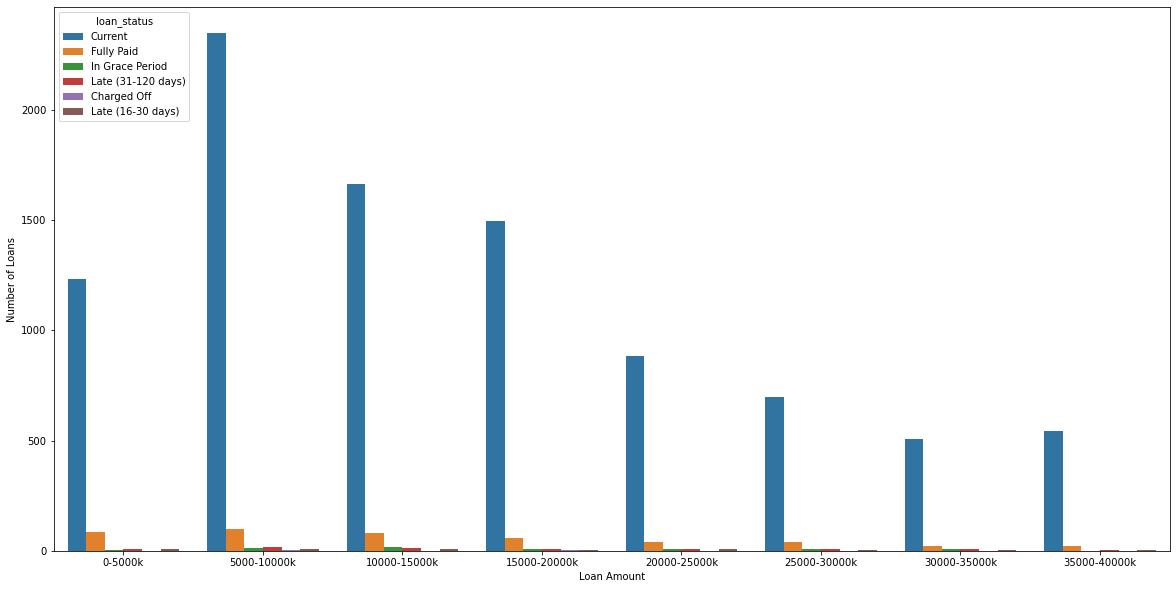

In [69]:
#Number of loan taken for loan amount range and their loan status
plt.figure(figsize=(20, 10))
s=sns.barplot(x='loan_amount_bin', y='loan_amount', hue="loan_status", data=df, estimator=lambda x:len(x))
s.set(xlabel='Loan Amount', ylabel='Number of Loans')
plt.show()

#### loans_status and their percentage


In [70]:
pd.DataFrame(df.groupby('loan_amount_bin')['loan_status'].value_counts(normalize=True) * 100)

loan_status
loan_amount_bin loan_status                    
0-5000k         Current               92.233010
                Fully Paid             6.422704
                Late (16-30 days)      0.522778
                Late (31-120 days)     0.448096
                In Grace Period        0.298730
                Charged Off            0.074683
5000-10000k     Current               94.565217
                Fully Paid             3.904992
                Late (31-120 days)     0.644122
                In Grace Period        0.523349
                Late (16-30 days)      0.281804
                Charged Off            0.080515
10000-15000k    Current               93.318360
                Fully Paid             4.604155
                In Grace Period        0.898372
                Late (31-120 days)     0.673779
                Late (16-30 days)      0.449186
                Charged Off            0.056148
15000-20000k    Current               95.171537
                Fully Paid             3.621347
                In Grace Period        0.508259
                Late (31-120 days)     0.381194
                Charged Off            0.190597
                Late (16-30 days)      0.127065
20000-25000k    Current               93.743372
                Fully Paid             4.135737
                In Grace Period        0.848356
                Late (16-30 days)      0.636267
                Late (31-120 days)     0.636267
25000-30000k    Current               91.963109
                Fully Paid             5.401845
                In Grace Period        1.185771
                Late (31-120 days)     1.185771
                Late (16-30 days)      0.263505
30000-35000k    Current               92.660550
                Fully Paid             4.403670
                In Grace Period        1.467890
                Late (31-120 days)     1.100917
                Late (16-30 days)      0.366972
35000-40000k    Current               94.608696
                Fully Paid             3.652174
                Late (31-120 days)     0.869565
                Late (16-30 days)      0.695652
                In Grace Period        0.173913

Observation 2:
    
Most loan taken is in the 5000 - 10,000 range. From the above analysis it can be concluded that for higher Loan amount there is high chance of charge off, as in by just comparing the percentages of the charge off accross all the load amount range. For instance comparing the charge-off of 0-5000k and 10000k-15000k the later is lesser than the one from 0-5000k    


# Term

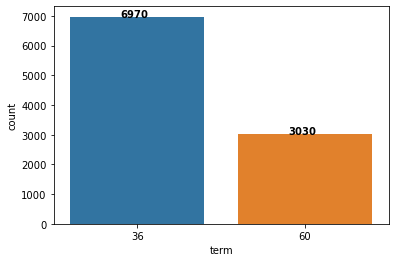

In [71]:
#Number of loans given for the respective term
ax=sns.countplot(x=df['term'])
for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()),fontweight ='bold')

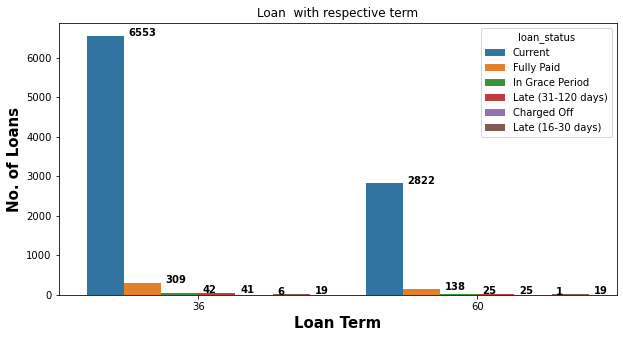

In [72]:
#Number of loans for the term as per loan status
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['term'],hue=df['loan_status'])
plt.xlabel('Loan Term',fontweight ='bold',fontsize = 15)
plt.ylabel('No. of Loans',fontweight ='bold',fontsize = 15)
plt.title('Loan  with respective term')
for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()),fontweight ='bold')

In [73]:
df.groupby('term')['loan_status'].value_counts(normalize=True) * 100

term  loan_status       
36    Current               94.017217
      Fully Paid             4.433286
      In Grace Period        0.602582
      Late (31-120 days)     0.588235
      Late (16-30 days)      0.272597
      Charged Off            0.086083
60    Current               93.135314
      Fully Paid             4.554455
      In Grace Period        0.825083
      Late (31-120 days)     0.825083
      Late (16-30 days)      0.627063
      Charged Off            0.033003
Name: loan_status, dtype: float64

Observation 3:

Most loan taken is for 36 months. This is because the longer the term the higher the interest hence individuals will defer from taking long term loan. For 60 months loan term there is 0.033% charged off while for 36 months period, a charge off percentage of 0.08% is observed. 

# Grade

In [74]:
df['grade'].value_counts()

B    3037
C    2653
A    2459
D    1446
E     335
F      58
G      12
Name: grade, dtype: int64

In [75]:
df.groupby('grade')['loan_status'].value_counts(normalize = True) * 100

grade  loan_status       
A      Current               95.201301
       Fully Paid             4.026027
       In Grace Period        0.406669
       Late (31-120 days)     0.162668
       Late (16-30 days)      0.122001
       Charged Off            0.081334
B      Current               95.357260
       Fully Paid             3.556141
       Late (31-120 days)     0.428054
       In Grace Period        0.362200
       Late (16-30 days)      0.230491
       Charged Off            0.065854
C      Current               92.989069
       Fully Paid             5.050886
       Late (31-120 days)     0.753864
       In Grace Period        0.716170
       Late (16-30 days)      0.452318
       Charged Off            0.037693
D      Current               91.493776
       Fully Paid             5.117566
       Late (31-120 days)     1.313970
       In Grace Period        1.244813
       Late (16-30 days)      0.691563
       Charged Off            0.138313
E      Current               86.865672

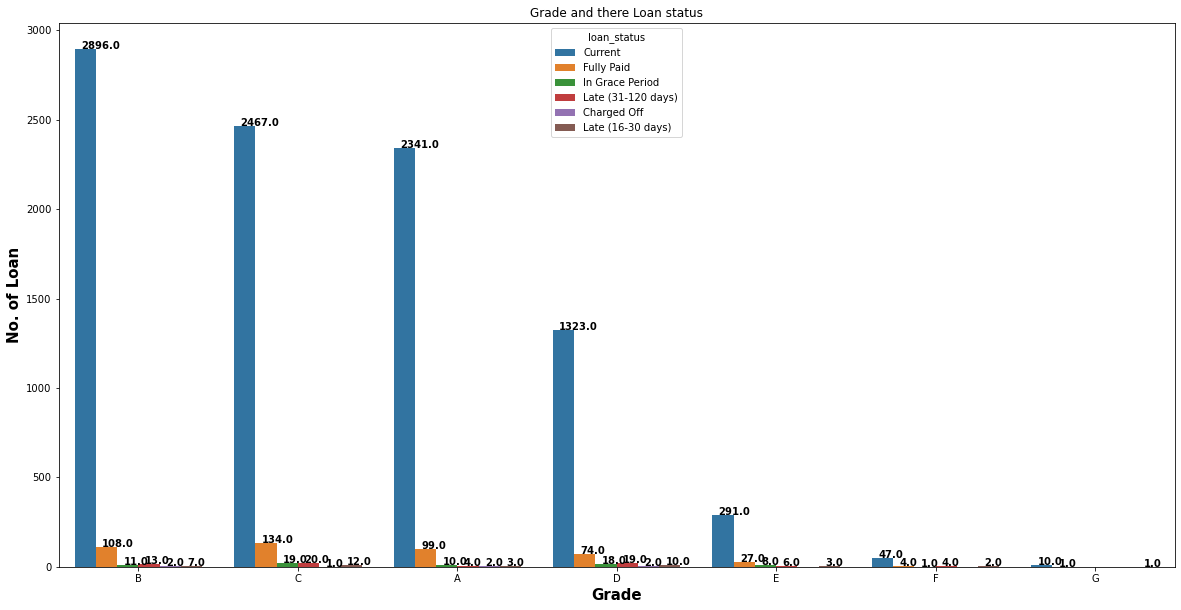

In [76]:
#Grade for the laon and their loan_status
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['grade'],hue=df['loan_status'],order=df['grade'].value_counts().index)
plt.xlabel('Grade',fontweight ='bold',fontsize = 15)
plt.ylabel('No. of Loan',fontweight ='bold',fontsize = 15)
plt.title('Grade and there Loan status')
for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()),fontweight ='bold')

Observation 4:

Loan grading is a system for providing a quality grade to a loan based on the credit history of the borrower, the quality of the collateral, and the likelihood of principal and interest payments.For our case,grade B took more loan than that of any other grades and there are significantly less number of loans taken for grade A, F, and G but high percentage of loans that are charged off.

# Employment lenght

In [77]:
percentage=df.groupby('emp_length')['loan_status'].value_counts(normalize=True) * 100
percentage

emp_length  loan_status       
0.0         Current               92.898551
            Fully Paid             5.362319
            Late (16-30 days)      0.724638
            Late (31-120 days)     0.724638
            In Grace Period        0.289855
1.0         Current               92.116788
            Fully Paid             5.839416
            Late (31-120 days)     0.875912
            In Grace Period        0.729927
            Late (16-30 days)      0.291971
            Charged Off            0.145985
2.0         Current               93.898656
            Fully Paid             3.516029
            In Grace Period        1.240951
            Late (16-30 days)      0.723888
            Late (31-120 days)     0.620476
3.0         Current               94.547564
            Fully Paid             4.060325
            Late (31-120 days)     0.812065
            Late (16-30 days)      0.464037
            In Grace Period        0.116009
4.0         Current               93.617021
 

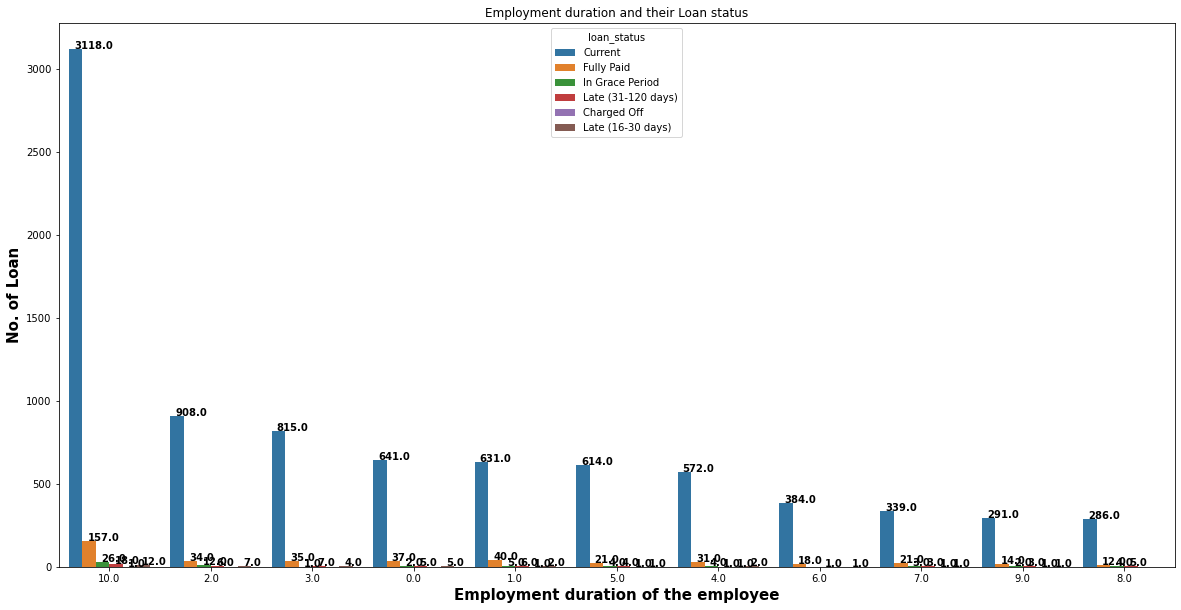

In [78]:
#Loan count as per employment duration and their loan status
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['emp_length'],hue=df['loan_status'],order=df['emp_length'].value_counts().index)
plt.xlabel('Employment duration of the employee',fontweight ='bold',fontsize = 15)
plt.ylabel('No. of Loan',fontweight ='bold',fontsize = 15)
plt.title('Employment duration and their Loan status')
for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()),fontweight ='bold')

Observation 5:
    
Most number of loans are taken by people who have 10 or 10+ years of employment. This might be due to the increase in employee salary as they might have the abilty to repay the loan in due time or even earlier which allows them to have higher chances of getting higher loan amount. 

### Loan_amount, interest_rate, and loan_status

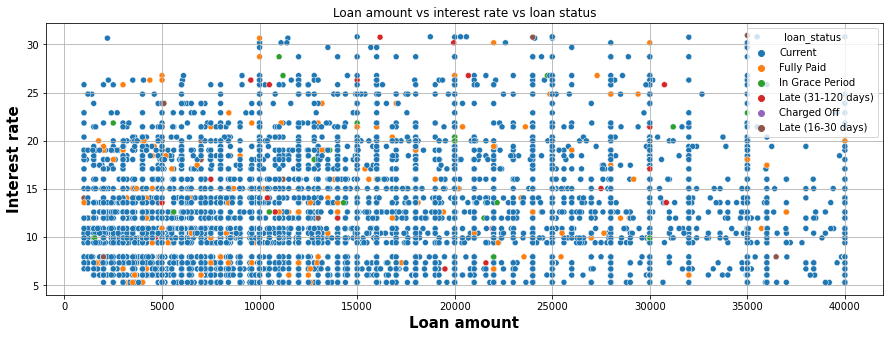

In [79]:
#Loan amount vs interest rate vs loan status
plt.figure(figsize=(15,5)) 
sns.scatterplot(x=df['loan_amount'],y=df['interest_rate'],hue=df['loan_status'])
plt.xlabel('Loan amount',fontweight ='bold',fontsize = 15)
plt.ylabel('Interest rate',fontweight ='bold',fontsize = 15)
plt.title('Loan amount vs interest rate vs loan status')
plt.grid()
plt.show()

Observation 6:

According to the analysis made until now, it is observed that the higher loan amount there is higher interest rate, This is according to traditional finance theory, as the size of a loan grows larger, the interest rate on that loan rises to compensate for the increased risk. There is also more charged off loan for higher interest rate because of the inabilty to payback the loan.

## loan_amount, interest_rate, term

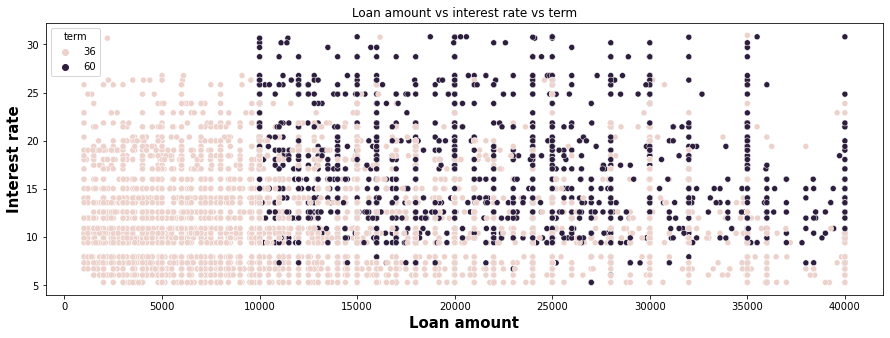

In [80]:
#Loan amount vs interest rate vs term
plt.figure(figsize=(15,5)) 
sns.scatterplot(x=df['loan_amount'],y=df['interest_rate'],hue=df['term'])
plt.xlabel('Loan amount',fontweight ='bold',fontsize = 15)
plt.ylabel('Interest rate',fontweight ='bold',fontsize = 15)
plt.title('Loan amount vs interest rate vs term')
plt.show()

Observation:
    
The study discovered that the lending interest rate and average loan term have a favorable association. This means that while the lending interest rate rises in months, the average loan term decreases, and vice versa.
For higher loan amount most of the loan term is 60 months.

# Prediction

### Data Cleaning and Preprocessing

The translation of the raw dataset into a comprehensible format is known as data preparation. Data preprocessing is a critical step in data mining that improves data efficiency. Data pretreatment techniques have a direct impact on the results of any analytical procedure or algorithm.There are several steps that can be done to achieve the data cleaning processes:

#### Importing Datasets and Libraries

Importing thelibraries that will be used in the program is usually the first step.since we have loaded our data earlier on we don't need to import to import libraries for loading datasets. A library is essentially a collection of callable and usable modules.
The libraries can also be imported into Python programming using the 'import' keyword.

In [81]:
# libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

#### Loading the Data

Loading the data using Pandas library using read_csv() method

In [82]:
df=pd.read_csv("loans_full_schema.csv")
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

# Dealing with null values

We may occasionally discover that some data in the dataset is missing. If missing values are identified, we can either eliminate those rows or calculate the feature's mean, mode, or median and replace them with missing values. This is an approximation that can add to the dataset's variance.

#### checking for null values

We can find the total number of entries as well as the count of non-null values with datatype of all features using info(). We can also use dataset.isnull() to see how many null values there are in our dataset.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [85]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [88]:
cols_to_del=["emp_title","annual_income_joint","verification_income_joint",
             "months_since_90d_late","debt_to_income_joint","months_since_last_credit_inquiry",
             "months_since_last_delinq"]

## Dropping Null value with higher percentage

The dropna() method in Pandas can be used to remove missing data from a row or column. Dropna() can be used to eliminate all the rows with missing data. We can replace null values with strategy.
For replacing null values we use the strategy that can be applied on a feature which has numeric data. We can calculate the Mean, Median or Mode of the feature and replace it with the missing values

In [89]:
new_df=df.drop(cols_to_del,axis=1)
new_df.shape

(10000, 48)

## categorical and dummy variables

Because the models are built on mathematical equations and calculations, it is now more difficult for machines to interpret and process texts rather than numbers. As a result, we must encode categorical data. we will convert them to dummies as below, although you can use other Scikit libraries.

In [90]:
print([column for column in df.columns if df[column].dtype == object])

['emp_title', 'state', 'homeownership', 'verified_income', 'verification_income_joint', 'loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month', 'loan_status', 'initial_listing_status', 'disbursement_method']


In [91]:
dummies=[column for column in new_df.columns if new_df[column].dtype == object]
dummies

['state',
 'homeownership',
 'verified_income',
 'loan_purpose',
 'application_type',
 'grade',
 'sub_grade',
 'issue_month',
 'loan_status',
 'initial_listing_status',
 'disbursement_method']

In [92]:
dummies = ['state', 'homeownership', 'verified_income', 'loan_purpose',"loan_status", 
           'application_type', 'grade',"sub_grade","issue_month","initial_listing_status","disbursement_method"]

In [93]:
dt=pd.get_dummies(new_df,columns=dummies,drop_first=True)
dt

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G4,issue_month_Jan-2018,issue_month_Mar-2018,initial_listing_status_whole,disbursement_method_DirectPay
0,3.0,90000.0,18.01,0,2001,6,28,10,70795,38767,...,0,0,0,0,0,0,0,1,1,0
1,10.0,40000.0,5.04,0,1996,1,30,14,28800,4321,...,0,0,0,0,0,0,0,0,1,0
2,3.0,40000.0,21.15,0,2006,4,31,10,24193,16000,...,0,0,0,0,0,0,0,0,0,0
3,1.0,30000.0,10.16,0,2007,0,4,4,25400,4997,...,0,0,0,0,0,0,1,0,1,0
4,10.0,35000.0,57.96,0,2008,7,22,16,69839,52722,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,0,2008,5,44,13,199195,77963,...,0,0,0,0,0,0,1,0,1,0
9996,8.0,121000.0,32.38,4,1994,1,28,15,382061,101571,...,0,0,0,0,0,0,0,0,1,0
9997,10.0,67000.0,45.26,2,2004,0,18,11,346402,95421,...,0,0,0,0,0,0,0,0,0,0
9998,1.0,80000.0,11.99,0,1999,1,38,15,294475,27641,...,0,0,0,0,0,0,0,0,1,0


In [94]:
dt.isnull().sum()

emp_length                       817
annual_income                      0
debt_to_income                    24
delinq_2y                          0
earliest_credit_line               0
                                ... 
sub_grade_G4                       0
issue_month_Jan-2018               0
issue_month_Mar-2018               0
initial_listing_status_whole       0
disbursement_method_DirectPay      0
Length: 148, dtype: int64

In [95]:
dt.fillna(dt.mean(), inplace=True)# filling with strategy

In [96]:
dt.isnull().sum()

emp_length                       0
annual_income                    0
debt_to_income                   0
delinq_2y                        0
earliest_credit_line             0
                                ..
sub_grade_G4                     0
issue_month_Jan-2018             0
issue_month_Mar-2018             0
initial_listing_status_whole     0
disbursement_method_DirectPay    0
Length: 148, dtype: int64

In [97]:
dt.corr()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G4,issue_month_Jan-2018,issue_month_Mar-2018,initial_listing_status_whole,disbursement_method_DirectPay
emp_length,1.000000,0.094126,0.023737,0.008032,-0.214617,0.003601,0.128156,0.064800,0.143630,0.019291,...,-0.002230,-0.002295,-0.005863,-0.013698,-0.004508,0.011468,-0.002700,-0.001656,0.020192,-0.031742
annual_income,0.094126,1.000000,-0.180120,0.052236,-0.156001,0.090119,0.210163,0.176788,0.516703,0.406370,...,-0.000721,0.003840,0.001789,-0.007292,-0.004088,0.000584,0.011162,-0.009703,0.050766,0.011331
debt_to_income,0.023737,-0.180120,1.000000,-0.027500,-0.089616,0.025360,0.198489,0.216908,0.075123,0.238072,...,0.003277,0.004752,0.026393,0.019127,0.011414,-0.001554,-0.000697,-0.009922,-0.009062,0.008627
delinq_2y,0.008032,0.052236,-0.027500,1.000000,-0.078109,0.003152,0.068040,0.013050,0.053373,0.001855,...,-0.009483,0.019786,0.006020,-0.006321,-0.010485,-0.003160,-0.006586,0.009355,-0.032595,-0.025903
earliest_credit_line,-0.214617,-0.156001,-0.089616,-0.078109,1.000000,0.042745,-0.294621,-0.174322,-0.231230,-0.140936,...,0.009579,0.000595,-0.012883,-0.008443,0.006506,-0.000372,-0.022365,0.024752,-0.024131,0.013054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub_grade_G4,0.011468,0.000584,-0.001554,-0.003160,-0.000372,0.012781,-0.002255,-0.000689,-0.001461,-0.004996,...,-0.000300,-0.000300,-0.000224,-0.000200,-0.000332,1.000000,-0.007170,0.013285,0.004676,-0.002777
issue_month_Jan-2018,-0.002700,0.011162,-0.000697,-0.006586,-0.022365,0.003186,0.007832,0.002449,0.004949,-0.006659,...,0.006652,0.006652,0.012304,-0.003781,0.008062,-0.007170,1.000000,-0.539691,-0.053353,-0.054126
issue_month_Mar-2018,-0.001656,-0.009703,-0.009922,0.009355,0.024752,-0.003656,-0.007865,-0.003182,0.006955,-0.004486,...,0.005169,-0.001772,-0.007527,0.005758,-0.018702,0.013285,-0.539691,1.000000,0.036825,0.035536
initial_listing_status_whole,0.020192,0.050766,-0.009062,-0.032595,-0.024131,-0.033946,0.035399,0.017433,0.056136,0.027931,...,0.014033,0.014033,0.010458,0.009353,0.015516,0.004676,-0.053353,0.036825,1.000000,0.023706


## Predicting interest rate using linear regression and Decision tree Algorithms

## Logistic Regression

####  creating model

In [98]:
new_df.fillna(dt.mean(), inplace=True)

In [99]:
data=new_df.drop(dummies,axis=1)



## Divide the dataset into Dependent & Independent variable

The next step after importing the dataset is to identify the independent variable (X) and the dependent variable (Y) (Y).
In general, datasets can be labeled or unlabeled; in this case, I'm using a labeled dataset for a machine learning classification task and a short dataset for better understanding.

In [100]:
X = data.drop("interest_rate",axis=1).values
y = data['interest_rate'].values

In [101]:
print(X.shape)
print(y.shape)

(10000, 36)
(10000,)


### Split the dataset into training and test set

For applying models in machine learning, we commonly separate the data into Training and Testing data.
In general, we split the dataset into 70:30 or 80:20 (depending on the demand), which means that 70% of the data is used to train and 30% is used to test.
We will import train test split from the scikit-learn model selection package. Now we'll establish four training and test sets: X train (training portion of the features), X test (test part of the features), Y train (training part of the dependent variables connected with the X train sets, and hence the same indices), and Y test (test part of the dependent variables) (test part of the dependent variables associated with the X test sets, and therefore also the same indices). We'll give them the train test split command, which accepts the following parameters: arrays (X and Y), test size (An optimal allocation for the test set is 20% of the dataset; it is commonly assigned as 0.2; 0.25 would mean 25%.)t

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Normalizing data

Normalization scales the feature between 0.0 and 1.0 while maintaining its proportional range.Especially when the feature magnitude needs to be transformed in the [0,1] range. One of the greatest options is to use the Min-Max feature scaling technique.In this procedure, the data is scaled to a specified range – commonly 0 to 1.
To convert it to a scale, we'll utilize the standardization formula. To finish the job, we'll import the StandardScaler class from the sckit preprocessing library and create a StandardScaler object as usual.

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scaler = MinMaxScaler()

In [105]:
X_train = scaler.fit_transform(X_train)

In [106]:
X_test = scaler.transform(X_test)

#### Implementing Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [108]:
y_pred=model.predict(X_test)
y_pred

array([15.16624485, 10.34355048,  9.66007817, ...,  9.83882432,
        8.17949562, 11.86167366])

In [109]:
print(model.coef_)

[-6.43886743e-02 -3.16846458e+00  6.52609237e+00  2.96736860e+00
  3.27461475e-01  3.18567845e+00 -8.49513245e-01  4.66315775e+00
 -2.09819486e+00  4.08361692e+00  1.38829765e+00  2.09574214e+13
  4.50650259e+11 -8.91270750e-01 -2.72689857e+00  3.79501448e+00
 -3.15310996e+00 -1.64142977e+10 -4.50650259e+11  2.63472619e-01
 -6.65330013e+00 -1.79228716e+00 -4.18308337e+00  5.89896971e+00
 -1.91630620e+00 -2.30198730e+00 -2.09574214e+13 -8.98175201e+12
 -4.03005316e+01  8.27381969e+00  4.71499893e+01 -3.30858732e+00
 -5.01979426e+03  4.83440281e+03  5.31059620e+02  8.11912811e+00]


In [110]:
print(model.intercept_)

12.007387915024687


#### Evaluating the Model

The R-squared number is used to assess the overall fit of a linear model.
The proportion of variation is explained by R-squared. The proportion of variance described by the model in the observed data, or the reduction in error over the null model is because the null model only predicts the mean of the observed response, it lacks an intercept and a slope. R-squared is a number that ranges from 0 to 1.
Higher values are desirable since they indicate that the model can explain more variance.

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6692459081483708

## Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [113]:
y_pred = regressor.predict(X_test)

In [114]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,21.45,21.707
1,10.90,10.527
2,7.34,7.320
3,19.03,20.337
4,16.02,16.040
...,...,...
1995,6.08,5.924
1996,9.44,9.934
1997,9.43,8.673
1998,6.72,6.650


#### Evaluating the model

In [115]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7598520000000001
Mean Squared Error: 2.28471979
Root Mean Squared Error: 1.5115289577113633


In [116]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.76 degrees.
Accuracy: 93.59 %.


## Visualizing the results

### Linear Regression

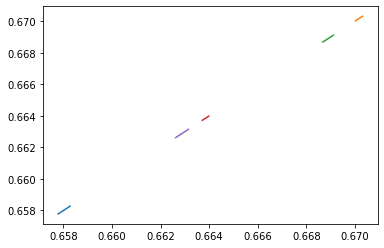

In [117]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

y_pred,y_test = validation_curve(Ridge(), X, y, param_name="alpha", param_range=np.logspace(-7, 3, 3),cv=5)
plt.plot(y_pred,y_pred)

### Random Forest Classifier

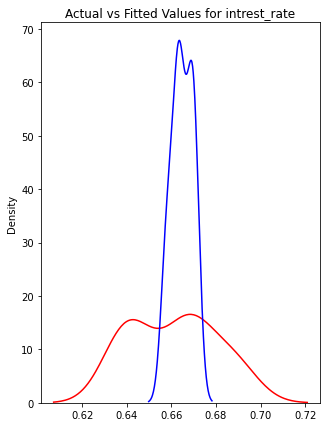

In [118]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for intrest_rate')
plt.show()
plt.close()


### Conclusion

By comparing the two algorithms in predicting interest rate, the use of Randomforest regressor is recommended. Since, it is good for classification and regression tasks on datasets with many entries and features presumably with missing values when we need to obtain a highly-accurate result whilst avoiding overfitting as we have seen where Randomforest achieves 93% accuracy while  linear regression achieves 66% in the above case. Also, random forest provides the relative feature importance, which allows to select the most relevant features and it is also much less interpretable than decision tree, but more interpretable than black-box models of neural networks.

If I had more time, I would have looked into to applying some ensembling techniques and also other Machine Learning models as well as potentially looking at a much larger sample of the Lending Club data to see if we can find some predictive lift in the investment-grade pool of loans.